In [1]:
import numpy as np
import matplotlib.pyplot as plt

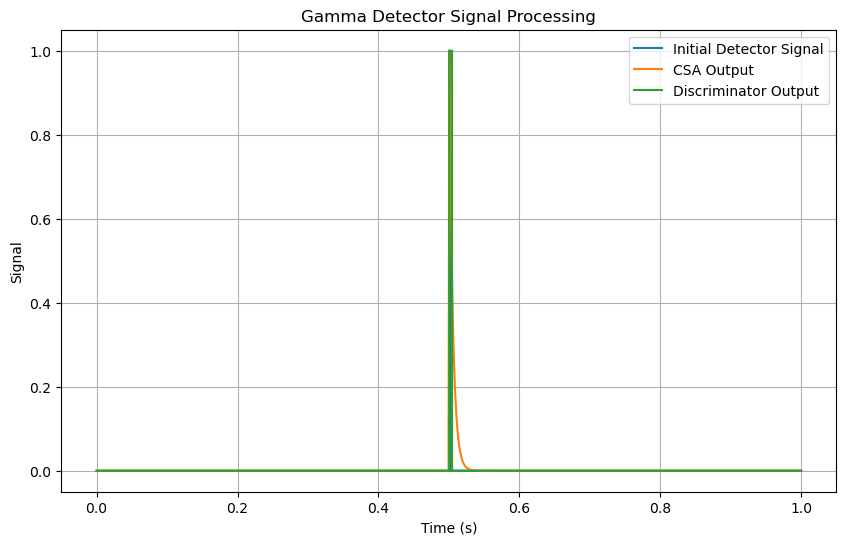

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Generate synthetic initial detector signal (single peak)
time = np.linspace(0, 1, 1000)
initial_signal = np.zeros_like(time)
peak_time = 0.5  # time at which the peak occurs
initial_signal[np.searchsorted(time, peak_time)] = 1

# Simulate CSA output (exponential decay filter)
tau = 5  # decay constant
b = [1]  # numerator coefficients of the filter
a = [1, -np.exp(-1/tau)]  # denominator coefficients of the filter
csa_output = lfilter(b, a, initial_signal)

# Generate discriminator output (thresholding)
threshold = 0.5
discriminator_output = (csa_output > threshold).astype(float)

# Plot the signals
plt.figure(figsize=(10, 6))

plt.plot(time, initial_signal, label='Initial Detector Signal', drawstyle='steps-post')
plt.plot(time, csa_output, label='CSA Output')
plt.plot(time, discriminator_output, label='Discriminator Output', drawstyle='steps-post')

plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.title('Gamma Detector Signal Processing')
plt.legend()
plt.grid(True)
plt.show()